Intuition
to plot the diameter of the network after an attack of 0.01, 0.02,0.03-0.1 of the nodes at random of all the networks

In [1]:
import networkx as nx
from itertools import combinations
import numpy as np
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #visualisation
from random import sample
import random, math
import LP 
import os
import scipy.io

datasets = ["\dolphins\dolphins.gml",
            "\polbooks\out2.txt",
            "\word_adjacencies.gml\word_adjacencies.gml",
            "\\arenas-email\\out2.txt",
            "Karate",
            "Erdos Renyi",
            "\\USAir97\\USAir97.mtx", 
            "\\circuits\s208_st.txt",
            "\\circuits\s420_st.txt",
            "\\circuits\s838_st.txt",
            "\\E. Coli\E. Coli.txt",
            "Barabasi_albert_graph",
            "\\facebook\\0.edges",
            "\\facebook\\107.edges",
            "\\facebook\\348.edges",
            "\\facebook\\414.edges",
            "\\facebook\\686.edges",
            "\\facebook\\1684.edges",
            "\\bio-celegans\\bio-celegans.mtx",
            "\\bn-macaque-rhesus_brain_2\\bn-macaque-rhesus_brain_2.txt",
            '\\soc-tribes\\soc-tribes.txt',
            '\\fb-pages-food\\fb-pages-food.txt',
            '\\bn-cat-mixed-species_brain_1\\bn-cat-mixed-species_brain_1.txt',
            '\\ca-sandi_auths\\ca-sandi_auths.mtx',
            '\\soc-firm-hi-tech\\soc-firm-hi-tech.txt']

def read_graph2(g):
    file_name = 'standard networks dataset' + datasets[int(g)]
    print(file_name)
    G = nx.Graph()
    if g==4:
        G = nx.karate_club_graph()
    elif g==5:
        # nodes = int(input("enter number of nodes?"))
        # edges= int(input("enter number of edges?"))
        G = nx.gnm_random_graph(500, 1500)
    elif g==11:
        # nodes = int(input("enter number of nodes?"))
        # edges= int(input("enter number of edges?"))
        # p = int(input("enter P value?"))
        G = nx.barabasi_albert_graph(500, 3)
    else:
        ext = os.path.splitext(file_name)[1]
        if ext=='.edges':
            G = nx.read_adjlist(file_name, create_using = nx.Graph(), nodetype = int)
        elif ext=='.gml':
            G = nx.read_gml(file_name)
        elif ext=='.mtx':
            G = None
            #matrix = scipy.io.mmread(file_name)
            #G = nx.from_scipy_sparse_matrix(matrix)
        elif ext=='.txt':
            file = open(file_name, 'r')
            lines=  file.readlines()
            G = nx.Graph()
            for line in lines:
                if " " in line:
                    N = line.split(" ")
                else:
                    N = line.split("\t")
                G.add_edge(N[0], N[1])
    if G:
        print(len(G.nodes()), len(G.edges()))
    return G

directory = "Networks/"
networks = []
for filename in os.listdir(directory):
    with open(os.path.join(directory, filename)) as file:
        networks.append(filename)

# read the networks
Datasets = []
for net in range(len(datasets)):
    Datasets.append(read_graph2(net))

standard networks dataset\dolphins\dolphins.gml
62 159
standard networks dataset\polbooks\out2.txt
190 441
standard networks dataset\word_adjacencies.gml\word_adjacencies.gml
112 425
standard networks dataset\arenas-email\out2.txt
1893 5451
standard networks datasetKarate
34 78
standard networks datasetErdos Renyi
500 1500
standard networks dataset\USAir97\USAir97.mtx
standard networks dataset\circuits\s208_st.txt
122 189
standard networks dataset\circuits\s420_st.txt
252 399
standard networks dataset\circuits\s838_st.txt
512 819
standard networks dataset\E. Coli\E. Coli.txt
1699 3758
standard networks datasetBarabasi_albert_graph
500 1491
standard networks dataset\facebook\0.edges
333 2519
standard networks dataset\facebook\107.edges
1034 26749
standard networks dataset\facebook\348.edges
224 3192
standard networks dataset\facebook\414.edges
150 1693
standard networks dataset\facebook\686.edges
168 1656
standard networks dataset\facebook\1684.edges
786 14024
standard networks dataset\

In [2]:
results = []
for n in range(len(datasets)):
    print(datasets[n])
    result = []
    G0 = Datasets[n]
    if G0:
        Nodes = G0.nodes()
        for i in range(0,100,5):
            G = G0.copy()
            t = i/1000
            K = round(len(Nodes)*t)
            attacked = random.sample(list(Nodes), k=K)
            print(f'Nodes = {len(Nodes)}\tK = {K}\tattacked = {len(attacked)}\t t = {t}')
            G.remove_nodes_from(attacked)
            if G:
                largest_component = G.subgraph(max(nx.connected_components(G), key=len))
                result.append([t, nx.algorithms.distance_measures.diameter(largest_component)])
        results.append(result)

\dolphins\dolphins.gml
Nodes = 62	K = 0	attacked = 0	 t = 0.0
Nodes = 62	K = 0	attacked = 0	 t = 0.005
Nodes = 62	K = 1	attacked = 1	 t = 0.01
Nodes = 62	K = 1	attacked = 1	 t = 0.015
Nodes = 62	K = 1	attacked = 1	 t = 0.02
Nodes = 62	K = 2	attacked = 2	 t = 0.025
Nodes = 62	K = 2	attacked = 2	 t = 0.03
Nodes = 62	K = 2	attacked = 2	 t = 0.035
Nodes = 62	K = 2	attacked = 2	 t = 0.04
Nodes = 62	K = 3	attacked = 3	 t = 0.045
Nodes = 62	K = 3	attacked = 3	 t = 0.05
Nodes = 62	K = 3	attacked = 3	 t = 0.055
Nodes = 62	K = 4	attacked = 4	 t = 0.06
Nodes = 62	K = 4	attacked = 4	 t = 0.065
Nodes = 62	K = 4	attacked = 4	 t = 0.07
Nodes = 62	K = 5	attacked = 5	 t = 0.075
Nodes = 62	K = 5	attacked = 5	 t = 0.08
Nodes = 62	K = 5	attacked = 5	 t = 0.085
Nodes = 62	K = 6	attacked = 6	 t = 0.09
Nodes = 62	K = 6	attacked = 6	 t = 0.095
\polbooks\out2.txt
Nodes = 190	K = 0	attacked = 0	 t = 0.0
Nodes = 190	K = 1	attacked = 1	 t = 0.005
Nodes = 190	K = 2	attacked = 2	 t = 0.01
Nodes = 190	K = 3	attacked

Nodes = 1699	K = 68	attacked = 68	 t = 0.04
Nodes = 1699	K = 76	attacked = 76	 t = 0.045
Nodes = 1699	K = 85	attacked = 85	 t = 0.05
Nodes = 1699	K = 93	attacked = 93	 t = 0.055
Nodes = 1699	K = 102	attacked = 102	 t = 0.06
Nodes = 1699	K = 110	attacked = 110	 t = 0.065
Nodes = 1699	K = 119	attacked = 119	 t = 0.07
Nodes = 1699	K = 127	attacked = 127	 t = 0.075
Nodes = 1699	K = 136	attacked = 136	 t = 0.08
Nodes = 1699	K = 144	attacked = 144	 t = 0.085
Nodes = 1699	K = 153	attacked = 153	 t = 0.09
Nodes = 1699	K = 161	attacked = 161	 t = 0.095
Barabasi_albert_graph
Nodes = 500	K = 0	attacked = 0	 t = 0.0
Nodes = 500	K = 2	attacked = 2	 t = 0.005
Nodes = 500	K = 5	attacked = 5	 t = 0.01
Nodes = 500	K = 8	attacked = 8	 t = 0.015
Nodes = 500	K = 10	attacked = 10	 t = 0.02
Nodes = 500	K = 12	attacked = 12	 t = 0.025
Nodes = 500	K = 15	attacked = 15	 t = 0.03
Nodes = 500	K = 18	attacked = 18	 t = 0.035
Nodes = 500	K = 20	attacked = 20	 t = 0.04
Nodes = 500	K = 22	attacked = 22	 t = 0.045
No

Nodes = 458	K = 2	attacked = 2	 t = 0.005
Nodes = 458	K = 5	attacked = 5	 t = 0.01
Nodes = 458	K = 7	attacked = 7	 t = 0.015
Nodes = 458	K = 9	attacked = 9	 t = 0.02
Nodes = 458	K = 11	attacked = 11	 t = 0.025
Nodes = 458	K = 14	attacked = 14	 t = 0.03
Nodes = 458	K = 16	attacked = 16	 t = 0.035
Nodes = 458	K = 18	attacked = 18	 t = 0.04
Nodes = 458	K = 21	attacked = 21	 t = 0.045
Nodes = 458	K = 23	attacked = 23	 t = 0.05
Nodes = 458	K = 25	attacked = 25	 t = 0.055
Nodes = 458	K = 27	attacked = 27	 t = 0.06
Nodes = 458	K = 30	attacked = 30	 t = 0.065
Nodes = 458	K = 32	attacked = 32	 t = 0.07
Nodes = 458	K = 34	attacked = 34	 t = 0.075
Nodes = 458	K = 37	attacked = 37	 t = 0.08
Nodes = 458	K = 39	attacked = 39	 t = 0.085
Nodes = 458	K = 41	attacked = 41	 t = 0.09
Nodes = 458	K = 44	attacked = 44	 t = 0.095
\bn-cat-mixed-species_brain_1\bn-cat-mixed-species_brain_1.txt
Nodes = 130	K = 0	attacked = 0	 t = 0.0
Nodes = 130	K = 1	attacked = 1	 t = 0.005
Nodes = 130	K = 1	attacked = 1	 t = 

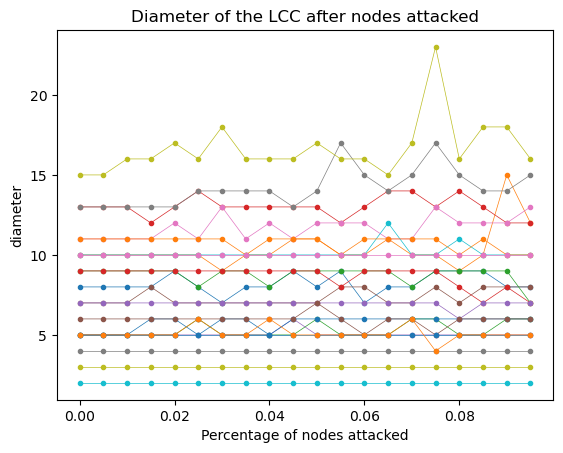

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for data in results:
    x = [item[0] for item in data]
    y = [item[1] for item in data]
    ax.plot(x, y, '-o', linewidth=0.5, markersize=3)

ax.set_xlabel('Percentage of nodes attacked')
ax.set_ylabel('diameter')
ax.set_title('Diameter of the LCC after nodes attacked')

plt.show()
